# Exploratory data analysis (EDA) on Haberman Dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings("ignore") 

# Haberman Dataset 

In [2]:
#Loading the dataset
haberman = pd.read_csv('haberman.csv')

In [3]:
#Q How many data points are in there
haberman.shape

(306, 4)

In [4]:
#Q what are the columns
haberman.columns

Index(['age', 'year', 'nodes', 'status'], dtype='object')

In [5]:
haberman.head()

,age,year,nodes,status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [6]:
# How many data points are present for each status value
haberman['status'].value_counts()

1    225
2     81
Name: status, dtype: int64

### Conclusions after looking at the dataset

-  We can conclude that there are two labels 1,2 and 1 is dominant over 2 hence making it an imbalanced dataset.

-  The objective here is to predict the survival of the patients which is depicted by the status variable and depends on the  remaining 3 variables age,year, nodes.

# PDFs

## PDF for Age

Text(0.5, 1.0, 'PDF for Age')

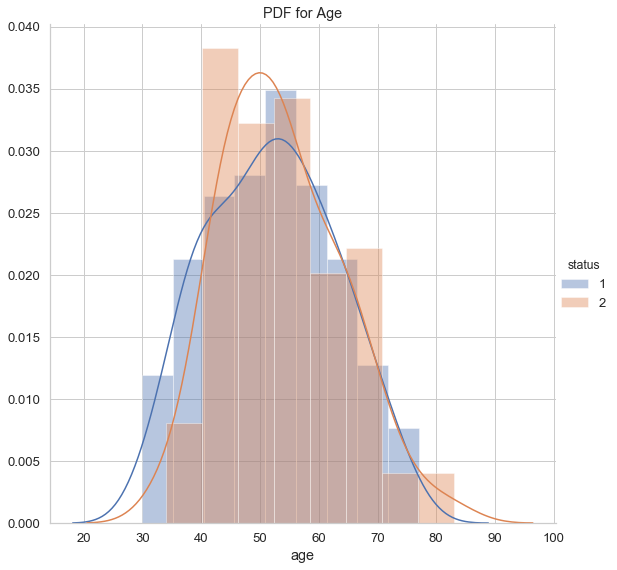

In [22]:
sns.FacetGrid(haberman,hue='status',size=8).map(sns.distplot,"age").add_legend()
plt.title('PDF for Age')

### Conclusion from the above pdf

We don't get a much clear picture from the above histogram but we can say that 
- Most no. of patients that survived 5 years or longer are between 55 - 60 
- Most no. of patients that not survived 5 years or longer are between 40 - 45

## PDF for Year

Text(0.5, 1.0, 'PDF for Year')

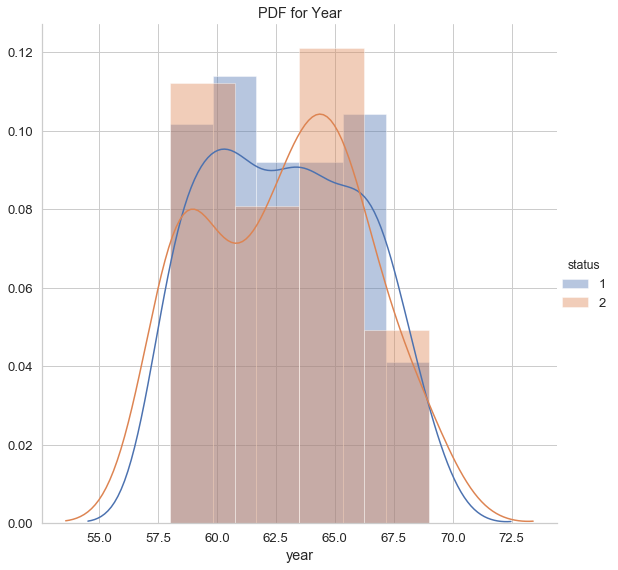

In [23]:
sns.FacetGrid(haberman,hue = 'status',size=8).map(sns.distplot,"year").add_legend()
plt.title('PDF for Year')

### Conclusion from the above pdf

As expected the years are not widely spread so the two histograms overlap each other. What we can say from the plot is 
- Most People who had undergone surgery between 1963 and 1966 died within 5 years of surgery
- Most People who had undergone surgery between 1960 and 1962 survived after 5 years of suirgery
- Also many people who had undergone surgery between 1958 and 1961 died within 5 years of surgery

#### Overall conclusion :
The Histogram doesn't helps much in separating the two labels.

## PDF for Nodes

Text(0.5, 1.0, 'PDF for Nodes')

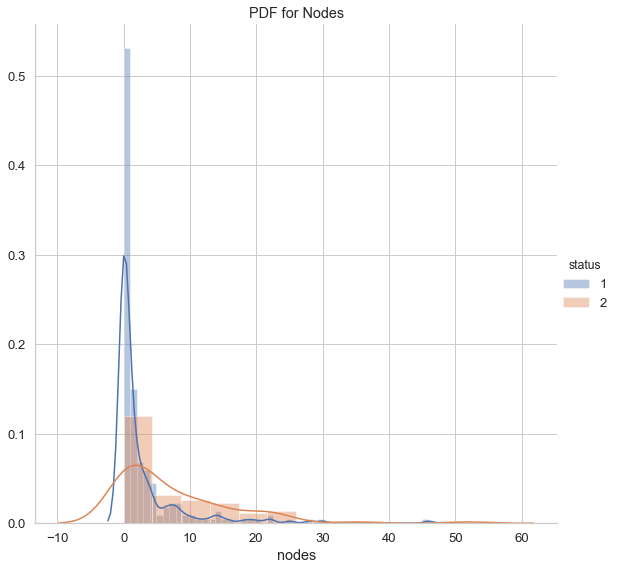

In [24]:
sns.FacetGrid(haberman,hue='status',size=8).map(sns.distplot,"nodes").add_legend()
plt.title('PDF for Nodes')

### Conclusion from the above pdf

This gives a better understanding. We can say
- The less the Number of positive axillary nodes detected the more are the chances of survivng for more than 5 years but 
   we see the majority or people who died within 5 years also had less the Number of positive axillary nodes detected but the no. of these people is      significantally less than of those who survived so we can conclude that people with 1 positive axillary node detected are      most likely to survive after 5 years of operation
   
   
- Majority of People with more than 1 positive axillary nodes detected died within 5 years of operation. 

#### Overall Conclusion  :
Node is a strong deciding factor for separation of two labels when compared to year and age.

## Continuing the further analysis with nodes as it seems more powerful than others. 

#### Separating the survived and died data points 

In [25]:
haberman_survived = haberman.loc[haberman['status'] == 1]
haberman_died = haberman.loc[haberman['status'] == 2]

# CDFs and having a look at the percentiles

## CDFs

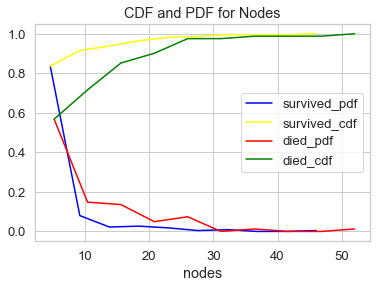

In [26]:
counts, bin_edges = np.histogram(haberman_survived['nodes'],bins = 10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color = 'blue',label='survived_pdf')
plt.plot(bin_edges[1:], cdf,color = 'yellow',label='survived_cdf')

counts, bin_edges = np.histogram(haberman_died['nodes'],bins = 10,density = True)
pdf = counts/sum(counts)
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:],pdf,color = 'red',label='died_pdf')
plt.plot(bin_edges[1:], cdf, color = 'green',label='died_cdf')
plt.xlabel('nodes')
plt.title("CDF and PDF for Nodes")
plt.legend()
plt.show()

There's not much we can say from  cdf curve. It's quite confusing.


# Mean and Std. Deviation

In [27]:
print(np.mean(haberman_survived['nodes']))
print(np.mean(haberman_died['nodes']))

2.7911111111111113
7.45679012345679


In [28]:
print("Std Deviation : ")
print(np.std(haberman_survived['nodes']))
print(np.std(haberman_died['nodes']))

Std Deviation : 
5.857258449412131
9.128776076761632


### From mean we can say that 
- The central tendency for survived cases is 2.7 and for unsurvived cases is 7.4 
- The means differ by a difference of 4.7 which is large

### When taking a look at Std Deviation we come to know that
- There is alot of variance in data and 
although the central tendancies for survived and died cases differ widely but as the variance or std. dev is more it indicates 
that data points are widely spreaded out and we cannot say that most points lie around the central tendancy.

# Median

In [29]:
print("Medians :")
print(np.median(haberman_survived['nodes']))
print(np.median(haberman_died['nodes']))

Medians :
0.0
4.0


### From median we see that 
- For survived case, 0 appears to be the middle meaning most of the nodes are 0 or atleast 50% or more than 50%
of data points are 0 as nodes start with 0.

- For the died case we can say atleast 50% of people had less than 4 nodes who died.

# Percentiles

In [30]:
print("Percentiles :")
print(np.percentile(haberman_survived['nodes'],np.arange(0,125,25)))
print(np.percentile(haberman_died['nodes'],np.arange(0,125,25)))

Percentiles :
[ 0.  0.  0.  3. 46.]
[ 0.  1.  4. 11. 52.]


### We can say that 
- 75% of people who survived had less than 3 nodes.
- 50 % people who died had less than 4 nodes and we see a significant incerease in nodes between 50th percentile and 75th percentile.
- even more betwwen 75th percentile and 100th percentile.

#### So from above what we can roughly conclude is chances of surviving is very high if the node is 0 and with increased number of node there is a more chance of not surviving.

# Median Absolute Deviation

In [31]:
from statsmodels import robust

print(robust.mad(haberman_survived['nodes']))
print(robust.mad(haberman_died['nodes']))

0.0
5.930408874022408


### From MAD we can say that 
- For people who survived, the nodes are not scattered and is 0 mostly and lie around it as mad is 0.
- For people who died we can say that the points are scattered and there is a lot of variance as mad is high.

# Box Plots

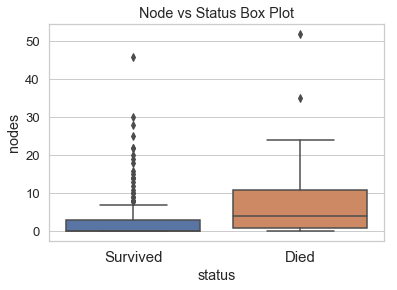

In [32]:
ax = sns.boxplot(x='status',y='nodes',data=haberman).set_xticklabels(['Survived','Died'],fontsize=15)
plt.title('Node vs Status Box Plot')
plt.show()

### Conclusions fron the boxplot

- We see some outliers being detected, points that are above 75th percentile + 1.5*IQr and below 
25th percentile - 1.5*IQR. 

- Other than that same conclusions as we got from calculating the median and percentiles. 

# Violin plots

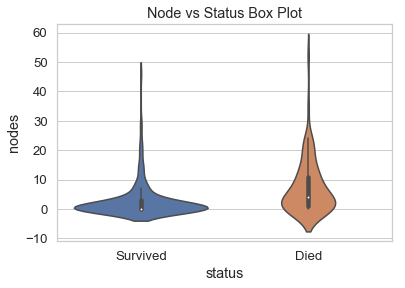

In [33]:
sns.violinplot(x='status',y='nodes',data=haberman).set_xticklabels(['Survived','Died'])
plt.title('Node vs Status Box Plot')
plt.show()

The curves represent the pdf and the box represents the box from the box plots
The white dot represents the median and upper and lower vertical line emerging from the box (not present here) represents the whiskers.
The box boundaries are the 25th and 75th percentile.

# Bivariate analysis using Pairplots.

### Plotting all the possible scatter plots.

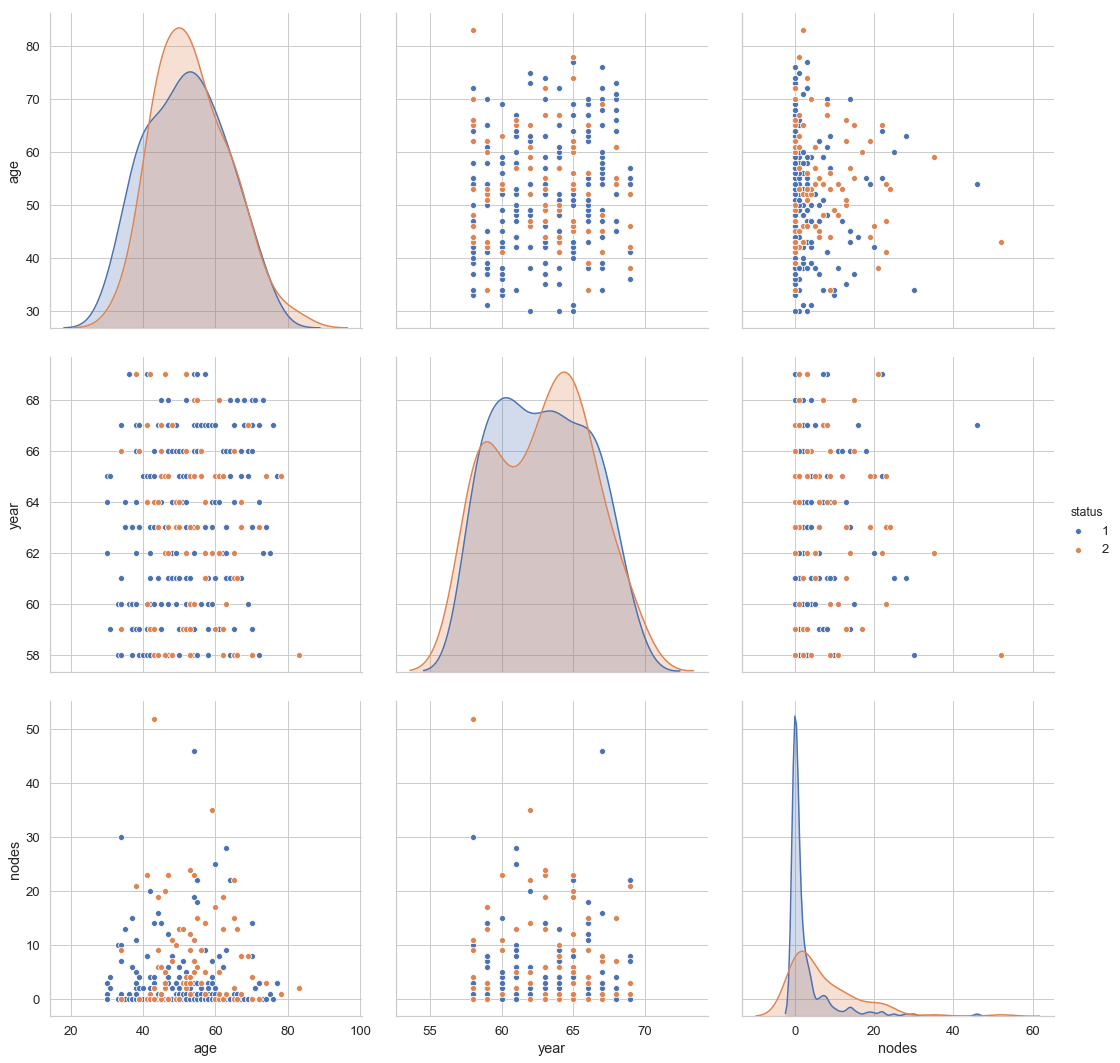

In [34]:
sns.set_style('whitegrid')
sns.pairplot(data=haberman,hue='status',vars=['age','year','nodes'],size = 5)
plt.show()

### Conclusion from the above pair plots:

#### We can't say much as most of the data points are scatterd, also none of them separate the two labels but from nodes and age we can say that 

- people are most likely to survive with nodes 0 irrespective of the age.Most likely because the no. survived people is dominant over died ones although the no. of died people is also significant.

#### Some more points:

   - Most of the patients died after the operation held in 1965 and even with 0 nodes.
   - Most of the patients survived after the operation held in 1961 even those who had 25 or 27 nodes.
   - From the nodes vs age we can say that mostly patients with age <= 40 survived although having many no. nodes.

# Contour Plots or 2D density plots

### Plotting joint plots or contour plots separately for both statuses between nodes and age

### Survived

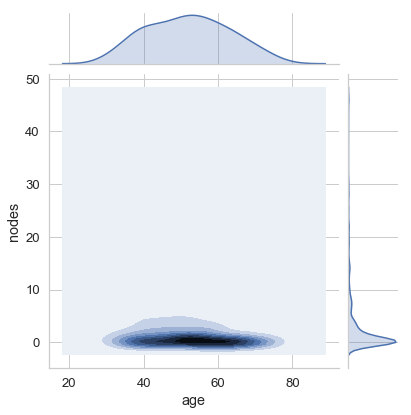

In [35]:
sns.jointplot(x='age',y='nodes',data = haberman_survived,kind='kde')
plt.show()

### For Died

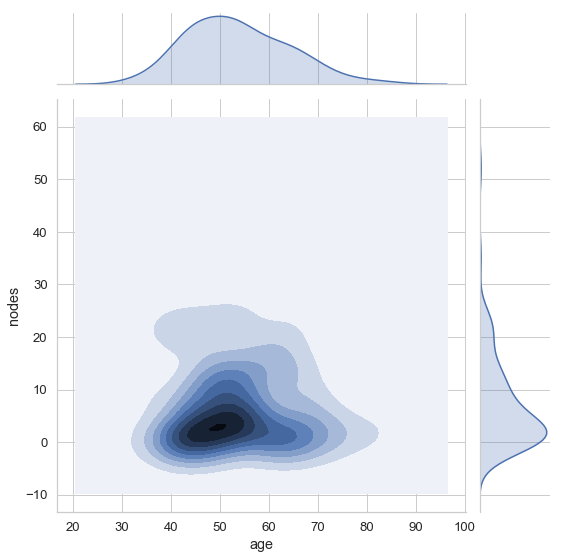

In [36]:
sns.jointplot(x='age',y='nodes',data = haberman_died,kind='kde',size = 8)
plt.show()

### Conclusions from above plots:

- Most people who survived  were between 48 - 60 and had 0 nodes but at same time most people between 48 - 52 died also
but had more than or = 3 nodes. 

- The maximum no. of people who died were between 48 - 52 but having more than 3 nodes. Many people died aged between 42 - 55 but seems
mostly having more than or = 1 node.

- In terms of age there is an intersection for the two labels but when combined with the nodes we say the intersection is less but still there.

# Final Conclusions:


1. Nodes is a strong deciding feature.
2. People with 0 nodes have more chances of surviving and people with nodes >0 have less chance of surviving especially when node = 1.
3. People with age <40 have more chance of surviving.
4. Age combined with axil_nodes tells us that most people died between 48 - 52 but had more than 3 nodes and The maximum no. of people who survived were between 48 - 60 having 0 nodes.